# Logistic Regression
There is are few problems with perceptron trick
1. It doesn't stabalizes the line. It finishes when all the the points are tracked by the line
2. It is always random. The equation of line is never the same\
In logistic regression, our aim is to make the line at equillibrium
\
Hence here if we don't want y-y_pred to be zero, we use a sigmoid function\
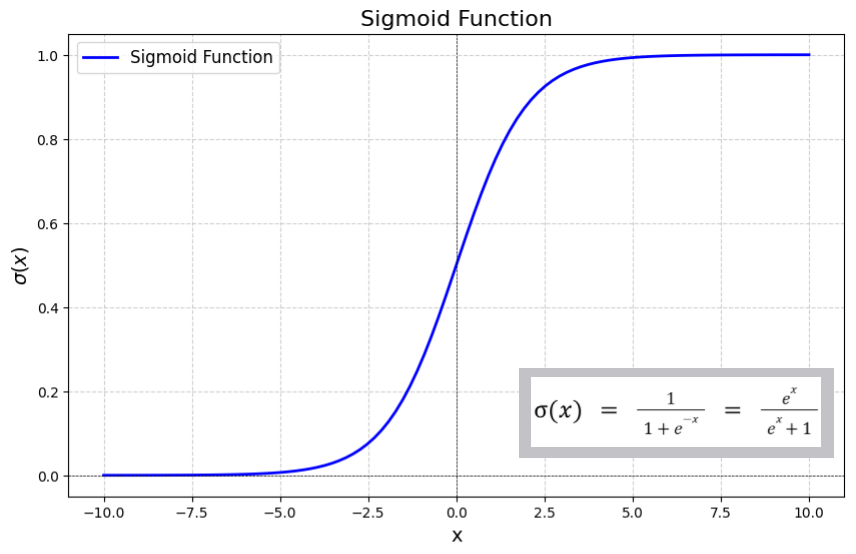



In [10]:
import numpy as np

def sigmoid(val):
    return 1/(1+(np.exp(-val)))

def logistic(X, y, lr):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])

    for i in range(X.shape[0]):
        j = np.random.randint(X.shape[0])
        y_hat = sigmoid(np.dot(X[j], weights))
        weights = weights + lr * (y[j] - y_hat)*(X[j])

    return weights[0], weights[1:]

In [12]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                           random_state=42, n_classes=2, n_clusters_per_class=1, hypercube=False, class_sep=10)

intercept_, coef_ = logistic(X, y, 0.01)

In [13]:
print(coef_)
print(intercept_)

[0.95634807 1.18719564]
0.9322242872597108


## Implementing Logistic Regression
Using above approach is very basic because it uses random points. There is no loss function defined. The loss function of logistic regression is defined on binary cross entropy. 

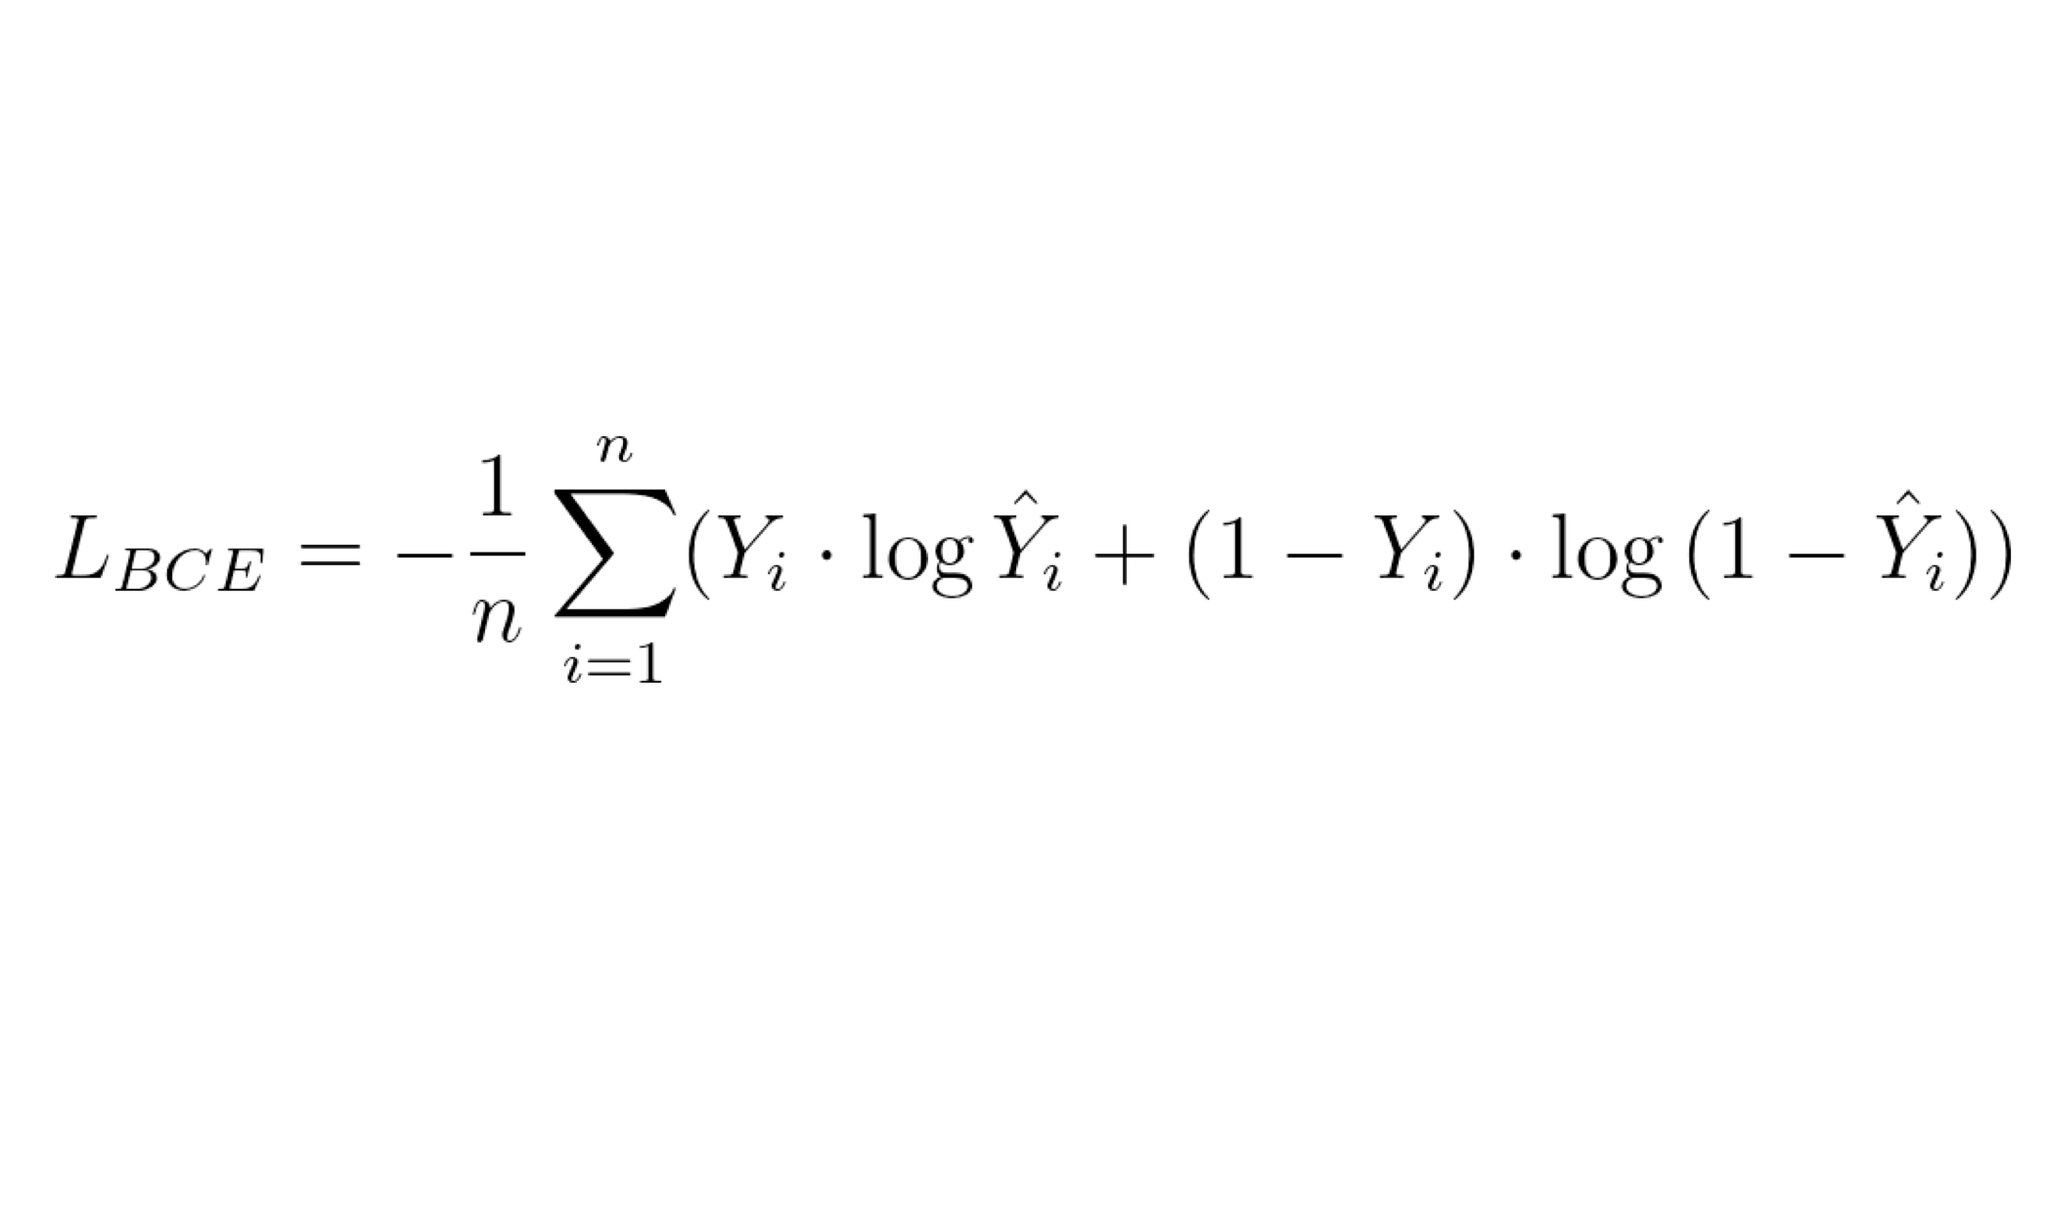

Since binary cross entropy is not closed form, we use gradient descent to apply logistic regression

In [ ]:
import numpy as np 

#unregularized lr.
class LogisticRegression:
    def __init__(self, learning_rate, epochs):
        self.lr = learning_rate
        self.epochs = epochs
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0, 1, axis=1)
        weight = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            y_pred = np.dot(X_train, weight)
            der_weight = np.dot(X_train, (y_train - y_pred))
            weight = weight + (self.lr * der_weight)

        self.coef_ = weight[1:]
        self.intercept_ = weight[0]

    def fit(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_